#  Electric Vehicle Adoption Analysis In The State Of Washington, United States of America
Electric vehicles (EVs) are reshaping transportation across the U.S., but adoption isn’t evenly distributed. Washington State, leading in clean energy initiatives, offers a valuable case study in understanding technology, policy, and accessibility.

This project analyzes publicly available EV registration data to uncover:

- Who has access to EVs?
- Where are the biggest gaps in infrastructure?
- Which manufacturers lead the race in innovation?
- How is electric vehicle technology evolving over time (for example, electric range)?

### Data Preprocessing overview

To answer these questions and understand them better, here are the steps taken:

- Cleaned and standardized the raw dataset (handling multi-utility rows, missing electric range, and geolocation parsing and mapping of rural and urban classification).
- Imputed missing electric range values based on the most common value per make and model.
- Categorized vehicles by electric range to simplify equity and trend analysis.
- Conducted exploratory data analysis (EDA) before to show the impact of preprocessing.


**The two main goals kept in mind were:**  <br>
### Analyze EV Accessibility & Infrastructure

- Are EVs accessible to everyone across Washington, urban and rural counties?
- Are policies like CAFV effective or are they underutilised?

### Analyze Technology & Market Trends

- How are electric range and adoption changing over time?
- Are certain manufacturers or vehicle types dominating the market?


> **_Important:_** The dataset analysed was taken from [Data.gov - Electric Vehicle Population](https://catalog.data.gov/dataset/electric-vehicle-population-data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ev = pd.read_csv(r'..\data\Electric_Vehicle_Population_Data.csv')

In [ ]:
print(ev.shape) # (246137, 17)
ev.info()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = ev.isna().sum().plot(kind='bar', title='Missing Values per Column')
plt.title("Missing Values in Raw Dataset")
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

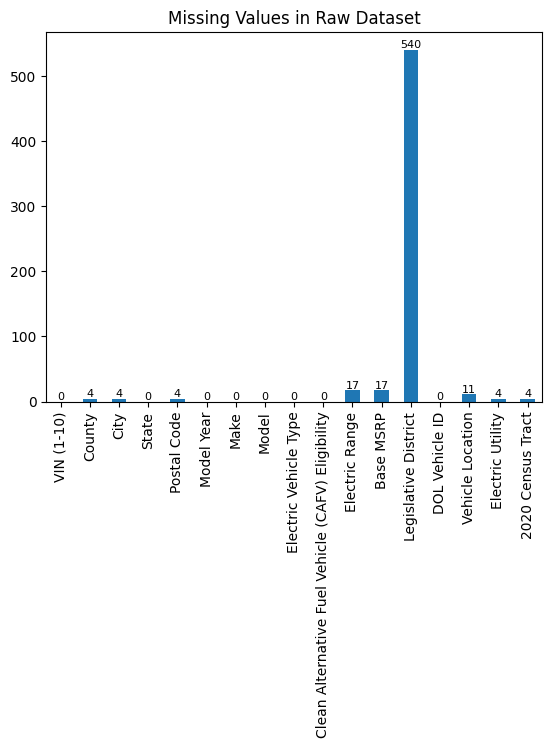

In [ ]:
ev['Electric Range'].hist(bins=50)
plt.title("Raw Electric Range Distribution (Includes 0s)")
plt.xlabel("Electric Range")
plt.ylabel("Frequency")

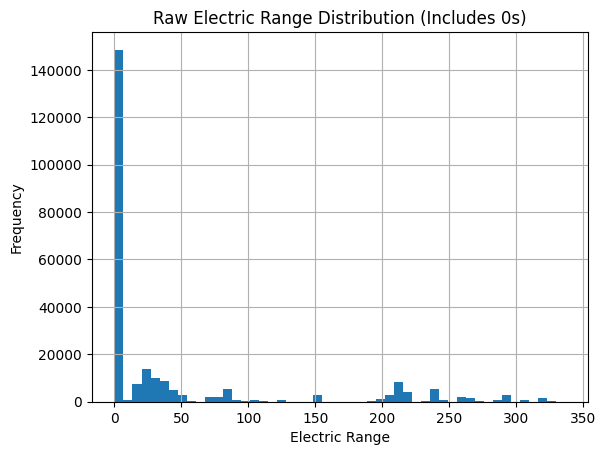

In [ ]:
ev[ev['Electric Utility'].str.contains(r'\|', na=False)].sample(5)

<div style="overflow-x: auto; max-width: 100%;">
  <style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: center;
    }

    table {
        border-collapse: collapse;
        width: 100%;
    }

    th, td {
        padding: 8px 12px;
        text-align: left;
        border: 1px solid #ddd;
        font-size: 13px;
        white-space: nowrap;
    }

    th {
        background-color: #000;
        color: white;
    }

    /* Highlight Electric Utility column (16th column including the row index) */
    .dataframe td:nth-child(17) {
        color: #0700f5;
        background-color: #b3fbff;
        font-weight: bold;
    }
  </style>

  <table class="dataframe">
    <thead>
      <tr style="text-align: centre;">
        <th>Index</th>
        <th>VIN (1-10)</th>
        <th>County</th>
        <th>City</th>
        <th>State</th>
        <th>Postal Code</th>
        <th>Model Year</th>
        <th>Make</th>
        <th>Model</th>
        <th>Electric Vehicle Type</th>
        <th>Clean Alternative Fuel Vehicle (CAFV) Eligibility</th>
        <th>Electric Range</th>
        <th>Base MSRP</th>
        <th>Legislative District</th>
        <th>DOL Vehicle ID</th>
        <th>Vehicle Location</th>
        <th>Electric Utility</th>
        <th>2020 Census Tract</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>74473</th>
        <td>5YJ3E1EA9J</td>
        <td>King</td>
        <td>Bellevue</td>
        <td>WA</td>
        <td>98004.0</td>
        <td>2018</td>
        <td>TESLA</td>
        <td>MODEL 3</td>
        <td>Battery Electric Vehicle (BEV)</td>
        <td>Clean Alternative Fuel Vehicle Eligible</td>
        <td>215.0</td>
        <td>0.0</td>
        <td>48.0</td>
        <td>475098347</td>
        <td>POINT (-122.1872 47.61001)</td>
        <td>PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)</td>
        <td>5.303302e+10</td>
      </tr>
      <tr>
        <th>74984</th>
        <td>KNDCC3LD3K</td>
        <td>Clark</td>
        <td>Vancouver</td>
        <td>WA</td>
        <td>98682.0</td>
        <td>2019</td>
        <td>KIA</td>
        <td>NIRO</td>
        <td>Plug-in Hybrid Electric Vehicle (PHEV)</td>
        <td>Not eligible due to low battery range</td>
        <td>26.0</td>
        <td>0.0</td>
        <td>17.0</td>
        <td>262087325</td>
        <td>POINT (-122.55149 45.69345)</td>
        <td>BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...</td>
        <td>5.301104e+10</td>
      </tr>
      <tr>
        <th>191043</th>
        <td>7SAYGDEE1N</td>
        <td>Pierce</td>
        <td>Gig Harbor</td>
        <td>WA</td>
        <td>98332.0</td>
        <td>2022</td>
        <td>TESLA</td>
        <td>MODEL Y</td>
        <td>Battery Electric Vehicle (BEV)</td>
        <td>Eligibility unknown as battery range has not b...</td>
        <td>0.0</td>
        <td>0.0</td>
        <td>26.0</td>
        <td>211180385</td>
        <td>POINT (-122.58964 47.34235)</td>
        <td>BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...</td>
        <td>5.305307e+10</td>
      </tr>
      <tr>
        <th>181155</th>
        <td>7SAYGDEE5P</td>
        <td>King</td>
        <td>Seattle</td>
        <td>WA</td>
        <td>98105.0</td>
        <td>2023</td>
        <td>TESLA</td>
        <td>MODEL Y</td>
        <td>Battery Electric Vehicle (BEV)</td>
        <td>Eligibility unknown as battery range has not b...</td>
        <td>0.0</td>
        <td>0.0</td>
        <td>43.0</td>
        <td>251239768</td>
        <td>POINT (-122.31307 47.66127)</td>
        <td>CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)</td>
        <td>5.303301e+10</td>
      </tr>
      <tr>
        <th>84690</th>
        <td>1N4AZ0CP4D</td>
        <td>Clark</td>
        <td>Vancouver</td>
        <td>WA</td>
        <td>98665.0</td>
        <td>2013</td>
        <td>NISSAN</td>
        <td>LEAF</td>
        <td>Battery Electric Vehicle (BEV)</td>
        <td>Clean Alternative Fuel Vehicle Eligible</td>
        <td>75.0</td>
        <td>0.0</td>
        <td>49.0</td>
        <td>131054969</td>
        <td>POINT (-122.64443 45.67871)</td>
        <td>BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...</td>
        <td>5.301104e+10</td>
      </tr>
    </tbody>
  </table>
</div>

# EV Data Cleaning & Preprocessing

### 1. Column Formatting & String Standardization
Before diving into analysis, standardized column names and stripped unnecessary whitespace from string fields to avoid inconsistencies.

In [ ]:
ev.columns = ev.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)

ev['model'] = ev['model'].str.upper().str.strip()
ev['make'] = ev['make'].str.upper().str.strip()
ev['county'] = ev['county'].str.title().str.strip()
ev['city'] = ev['city'].str.title().str.strip()
ev['electric_vehicle_type'] = ev['electric_vehicle_type'].str.strip()
ev['clean_alternative_fuel_vehicle_(cafv)_eligibility'] = ev['clean_alternative_fuel_vehicle_(cafv)_eligibility'].str.strip()


### 2. Replacing Fake Zeros with Real NaNs and Imputing Missing Electric Ranges
Discovered that a suspiciously large number of vehicles had an ```electric_range``` of 0 - clearly not real values for EVs. 
For rows missing ```electric_range```, used the most common value (mode) for the same (make, model) pair.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Replace zeroes with NA
ev['electric_range'] = ev['electric_range'].replace(0, pd.NA)

# Track missing before imputation
missing_before = ev['electric_range'].isna().sum()

range_map = (
    ev.groupby(['make', 'model'])['electric_range']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .to_dict()
)

def impute_range(row):
    if pd.isna(row['electric_range']):
        return range_map.get((row['make'], row['model']), np.nan)
    return row['electric_range']

ev['electric_range'] = ev.apply(impute_range, axis=1)

# Track missing after imputation
missing_after = ev['electric_range'].isna().sum()

# Bar plot of missing values before and after
plt.figure(figsize=(6, 4))
plt.bar(['Before Imputation', 'After Imputation'], [missing_before, missing_after], color=['deepskyblue', 'cyan'])
plt.ylabel('Number of Missing Values')
plt.xlabel('Missing Values in "electric_range"')
plt.title('Missing Value Imputation for Electric Range')
plt.tight_layout()
plt.show()


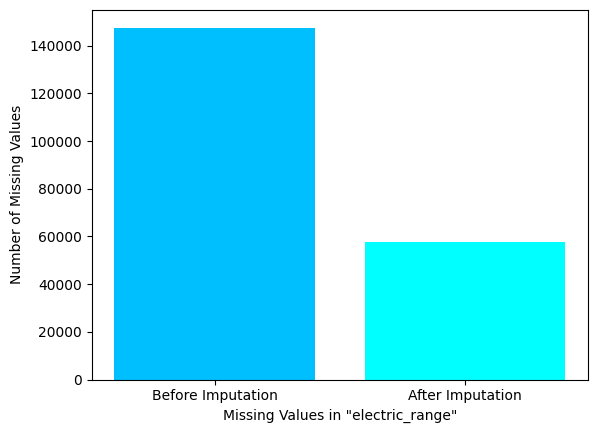

### 3. Creating Range Categories
To make analysis easier, we binned ranges into categories:

- Low < 100 miles
- Medium < 200
- High < 300
- Very High ≥ 300
- Unknown if still missing

In [ ]:
def categorize_range(r):
    if pd.isna(r): return 'Unknown'
    elif r < 100: return 'Low'
    elif r < 200: return 'Medium'
    elif r < 300: return 'High'
    else: return 'Very High'

ev['range_category'] = ev['electric_range'].apply(categorize_range)
order = ['Low', 'Medium', 'High', 'Very High', 'Unknown']
ev['range_category'].value_counts().reindex(order).plot(kind='bar', title='Electric Range Categories')

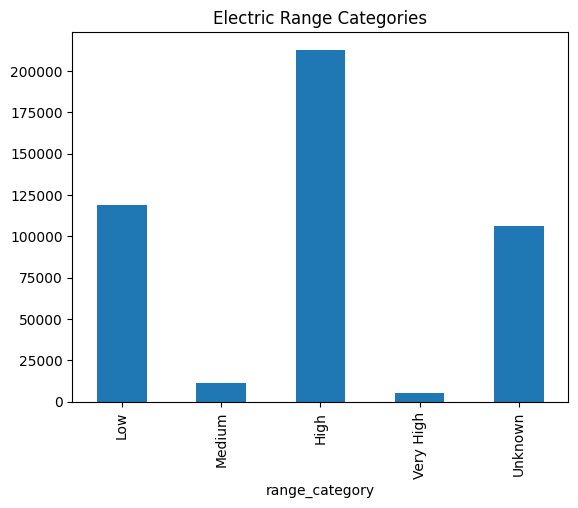

### 4. Extracting Coordinates from vehicle_location
Washington's dataset includes a WKT-style POINT (lon lat) string - so parsed ```vehicle_location``` into numeric ```longitude``` and ```latitude``` columns.

In [ ]:
ev[['longitude', 'latitude']] = ev['vehicle_location'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')
ev['latitude'] = pd.to_numeric(ev['latitude'], errors='coerce')
ev['longitude'] = pd.to_numeric(ev['longitude'], errors='coerce')
ev.drop(columns=['vehicle_location'], inplace=True)

### 5. Exploding Multi-Utility Entries
Some vehicles listed multiple utility providers under ```electric_utility``` (e.g., "Puget Sound Energy || Seattle City Light"). To clean this:

- We split on | or ||
- Removed whitespace
- Dropped empty values
- Then exploded into multiple rows

P.S. The number of missing ```electric_range``` values doubled after exploding. This is why we replaced zeros before exploding.

In [ ]:
ev['electric_utility'] = ev['electric_utility'].str.split(r'\|\|?')
ev['electric_utility'] = ev['electric_utility'].apply(
    lambda lst: [x.strip() for x in lst if x and x.strip()] if isinstance(lst, list) else []
)
ev = ev.explode('electric_utility')

### 6. CAFV Eligibility Simplified
Mapped complex CAFV eligibility strings into cleaner categories: ```Eligible```, ```Unknown```, and ```Not_Eligible```.

In [ ]:
cafv_map = {
    'Clean Alternative Fuel Vehicle Eligible': 'Eligible',
    'Eligibility unknown as battery range has not been researched': 'Unknown',
    'Not eligible due to low battery range': 'Not_Eligible'
}
ev['clean_alternative_fuel_vehicle_(cafv)_eligibility'] = ev['clean_alternative_fuel_vehicle_(cafv)_eligibility'].map(cafv_map)

### 7. Drop Garbage Rows + Unneeded Columns
Limited the dataset to:

- Vehicles registered in WA
- Vehicles with valid `lat`, `long`, and ```electric_utility```
- We also dropped columns like `VIN`, `postal code`, `MSRP`

In [ ]:
ev = ev[ev['state'] == 'WA']
ev = ev.dropna(subset=['county', 'city', 'postal_code', 'latitude', 'longitude', 'electric_utility'])
ev.drop(columns=['vin_(1-10)', '2020_census_tract', 'postal_code', 'base_msrp'], inplace=True)

### Final Output saved in /ouputs

In [ ]:
ev.to_csv(r'..\outputs\cleaned_ev.csv', index=False)

### Classifying Counties as Urban or Rural
To analyse demographs, the counties of washington were mapped to ```urban``` or ```rural``` based on the official classifications [here](ofm.wa.gov).
This helped in comparing ev adoption in different geographic regions.
The mapping is applied to the dataset using the ```county``` column, and a new column ```if_urban``` is created.

In [ ]:
washington_counties = {
    "Adams": "rural",
    "Asotin": "rural",
    "Cowlitz": "rural",
    "Columbia": "rural",
    "Chelan": "rural",
    "Franklin": "rural",
    "Ferry": "rural",
    "Clallam": "rural",
    "Island": "rural",       
    "Garfield": "rural",
    "Douglas": "rural",
    "Mason": "rural",
    "Jefferson": "rural",
    "Grant": "rural",
    "San Juan": "rural",     
    "Klickitat": "rural",
    "Grays Harbor": "rural",
    "Skagit": "rural",
    "Lincoln": "rural",
    "Kittitas": "rural",
    "Yakima": "rural",
    "Okanogan": "rural",
    "Lewis": "rural",
    "Pend Oreille": "rural",
    "Pacific": "rural",
    "Skamania": "rural",
    "Walla Walla": "rural",
    "Stevens": "rural",
    "Whitman": "rural",
    "Wahkiakum": "rural",
    "Benton": "urban",
    "Clark": "urban",
    "King": "urban",
    "Kitsap": "urban",
    "Pierce": "urban",
    "Snohomish": "urban",
    "Spokane": "urban",
    "Thurston": "urban",
    "Whatcom": "urban"
}
import pandas as pd
ev_clean = pd.read_csv(r'..\outputs\cleaned_ev.csv')
ev_clean['if_urban'] = ev_clean['county'].map(washington_counties)
ev_clean["if_urban"] = ev_clean["if_urban"].fillna("Urban")
ev_clean.to_csv(r'..\outputs\cleaned_ev.csv', index=False)

## Summary: Why All This Cleaning?
Without this cleaning:

- Our electric_range column was meaningless (0s everywhere)
- Multi-utility rows were inflating missing values
- Messy text fields and bad coordinates would've caused problems in location-based analysis

With this cleaned data, we’re now ready to:

- Explore EV adoption across WA
- Analyze range trends in electric range and policies
- Studied the distribution of different EV types and the impact of missing data